In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import seaborn as sns#visualization
import dexplot as dxp
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter

In [2]:
data=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
data.head()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.describe()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anemia                    299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
#check missing values
data.isnull().sum()

age                         0
anemia                      0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
def ef_cat(data) :
    
    if data["ejection_fraction"] <= 30 :
        return "ef_30"
    elif (data["ejection_fraction"] > 30) & (data["ejection_fraction"] <= 45 ) :
        return "ef_30_45"
    elif (data["ejection_fraction"] > 45) :
        return "ef_45"
    
data["ef_cat"] = data.apply(lambda data:ef_cat(data),axis = 1)

In [8]:
data['QuantileRank_Platelets']= pd.qcut(data['platelets'],  
                             q = 3, labels = False) 

In [9]:
def cret_level(data) :
    
    if (data["serum_creatinine"] <= 1.5) :
        return "sc_ls_1.5"
    return "sc_gt_1.5"
data["cret_level"] = data.apply(lambda data:cret_level(data),axis = 1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anemia                    299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  ef_cat                    299 non-null    object 
 14  QuantileRa

In [11]:
data

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,ef_cat,QuantileRank_Platelets,cret_level
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,ef_30,1,sc_gt_1.5
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,ef_30_45,1,sc_ls_1.5
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,ef_30,0,sc_ls_1.5
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,ef_30,0,sc_gt_1.5
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,ef_30,2,sc_gt_1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,ef_30_45,0,sc_ls_1.5
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,ef_30_45,1,sc_ls_1.5
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,ef_45,2,sc_ls_1.5
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,ef_30_45,0,sc_ls_1.5


<Figure size 1440x720 with 0 Axes>

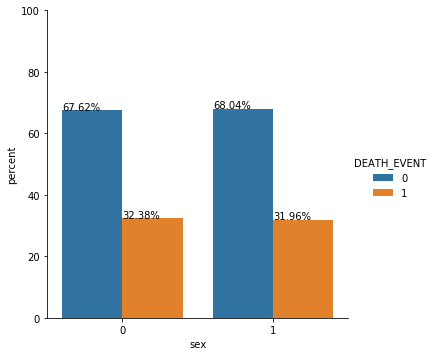

In [12]:
x,y = 'sex', 'DEATH_EVENT'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
plt.figure(figsize=(20,10))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


<Figure size 1440x720 with 0 Axes>

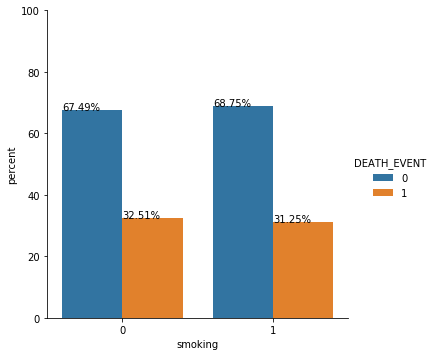

In [13]:
x,y = 'smoking', 'DEATH_EVENT'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
plt.figure(figsize=(20,10))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

<Figure size 1440x720 with 0 Axes>

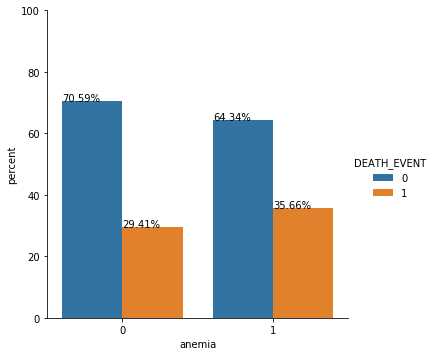

In [14]:
x,y = 'anemia', 'DEATH_EVENT'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
plt.figure(figsize=(20,10))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

<Figure size 1440x720 with 0 Axes>

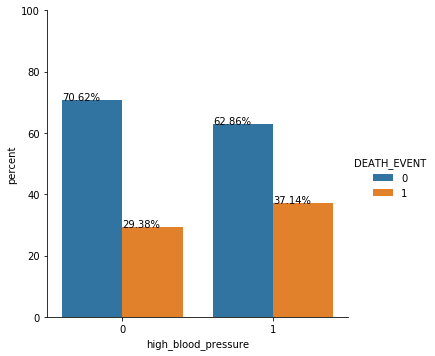

In [16]:
x,y = 'high_blood_pressure', 'DEATH_EVENT'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
plt.figure(figsize=(20,10))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

<Figure size 1440x720 with 0 Axes>

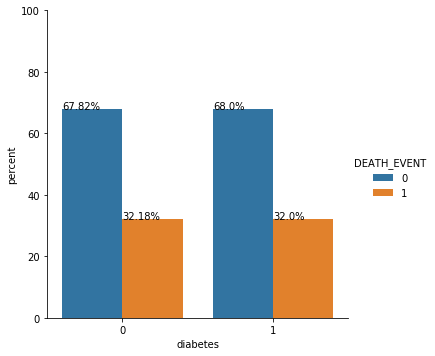

In [17]:
x,y = 'diabetes', 'DEATH_EVENT'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
plt.figure(figsize=(20,10))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

<Figure size 1440x720 with 0 Axes>

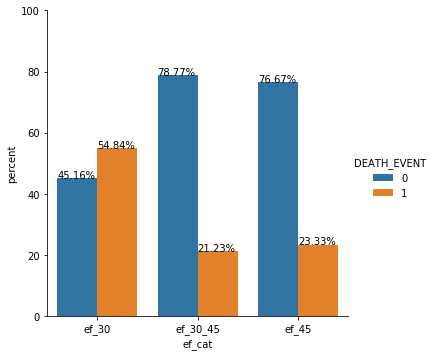

In [18]:
x,y = 'ef_cat', 'DEATH_EVENT'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
plt.figure(figsize=(20,10))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

<Figure size 1440x720 with 0 Axes>

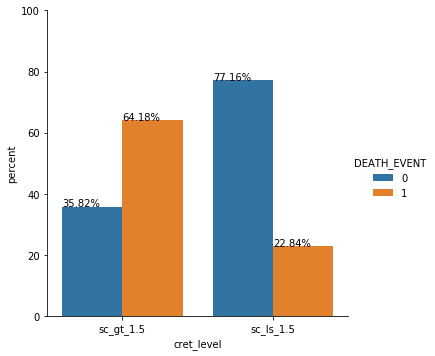

In [19]:
x,y = 'cret_level', 'DEATH_EVENT'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
plt.figure(figsize=(20,10))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

<Figure size 1440x720 with 0 Axes>

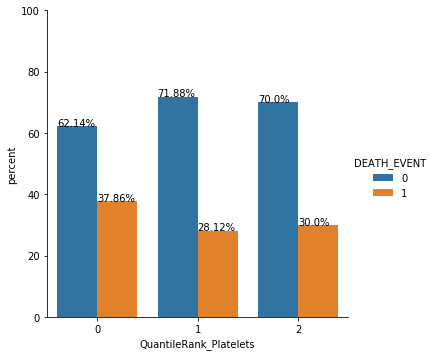

In [20]:
x,y = 'QuantileRank_Platelets', 'DEATH_EVENT'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
plt.figure(figsize=(20,10))
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [ ]:
#plt.figure(figsize=(19,6))
#sns.countplot(x="Age_grp",hue="DEATH_EVENT",data=data , order=["Age_40-50","Age_50-60","Age_60-70","Age_70-80","Age_80-90","Age_gt_90"])

In [24]:
#correlation of the variables
corr_dt= data.copy() 

In [25]:
corr_dt.ef_cat = corr_dt.ef_cat.replace({"ef_30": 0,"ef_30_45":1 , "ef_45":2})

In [26]:
corr_dt.cret_level = corr_dt.cret_level.replace({"sc_ls_1.5": 0,"sc_gt_1.5":1})

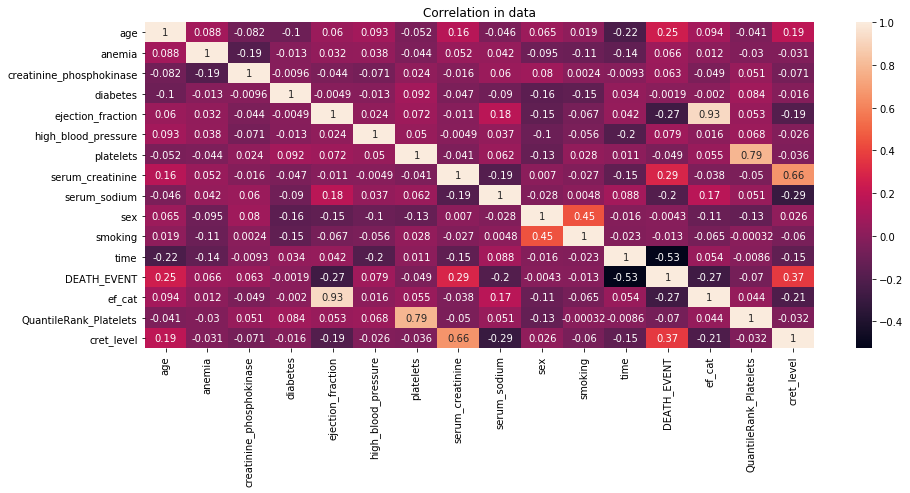

In [27]:
plt.figure(figsize=(15,6))
sns.heatmap(corr_dt.corr(),annot=True)
plt.title('Correlation in data')
plt.show()

In [29]:
#Apply ML algorithms
#Logistic regression
X = corr_dt.drop('DEATH_EVENT', axis=1)
Y = corr_dt['DEATH_EVENT']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.3,random_state=0)

In [31]:
X_train.shape

(209, 15)

In [32]:
Y_train.shape

(209,)

In [33]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
Y_pred = model1.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,Y_pred)
print('Accuracy is',"{:.2f}%".format(100*accuracy))

Accuracy is 78.89%


In [34]:
from sklearn.metrics import confusion_matrix
logmatx = confusion_matrix(Y_test, Y_pred)
print(logmatx)

[[58  4]
 [15 13]]


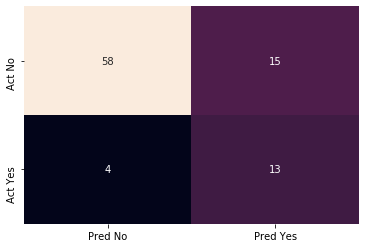

In [35]:
sns.heatmap(logmatx.T, annot=True, fmt='d', cbar=False,
          xticklabels=['Pred No','Pred Yes'],
          yticklabels=['Act No','Act Yes'] )

In [ ]:
 #Disease was diagnosed by cardiac echo report or notes written by physician. Age, serum sodium, serum creatinine, gender, smoking, Blood Pressure (BP), Ejection Fraction (EF), anemia, platelets, Creatinine Phosphokinase (CPK) and diabetes were considered as potential variables explaining mortality caused by CHD. Age, serum sodium and CPK are continuous variables whereas EF, serum creatinine and platelets were taken as categorical variables. EF was divided into three levels (i.e. EF≤30, 30<EF≤45 and EF>45) and platelets was also divided into three level on the basis of quartiles. Serum creatinine greater than its normal level (1.5) is an indicator of renal dysfunction. Its effect on mortality was studied as creatinine >1.5 vs ≤1.5. Anemia in patients was assessed by their haematocrit level. Following McClellan et al. [4] the patients with haematocrit less than 36 (minimum normal level of haematocrit) were taken as anemic. 

Populating the interactive namespace from numpy and matplotlib


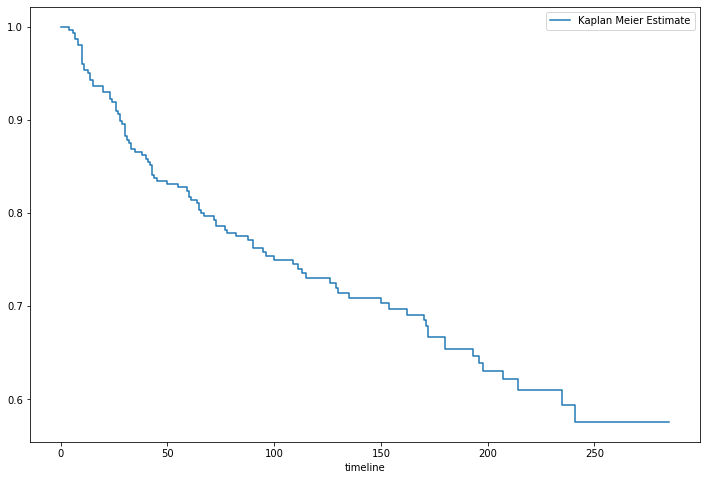

In [36]:
## create a kmf object
kmf = KaplanMeierFitter() 
T = data.time
E = data.DEATH_EVENT

## Fit the data into the model
kmf.fit(T, E,label='Kaplan Meier Estimate')
## Create an estimate
%pylab inline
figsize(12,8)
kmf.plot(ci_show=False) ## ci_show is meant for Confidence interval

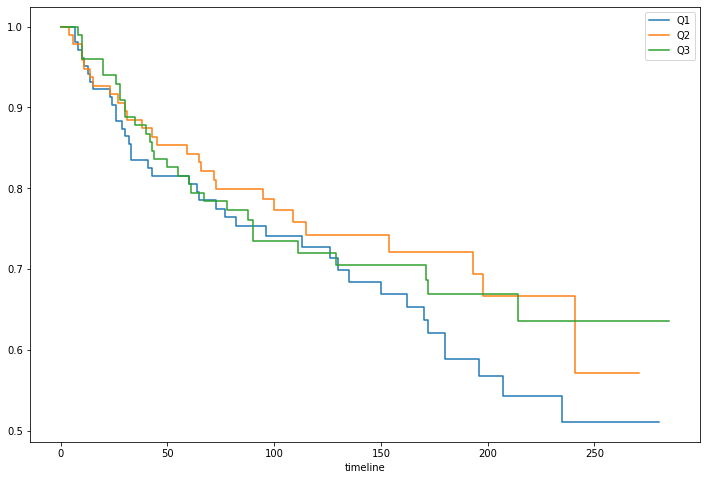

In [38]:
#KM curve based on Platelets
group1=data[data['QuantileRank_Platelets']== 0]
group2=data[data['QuantileRank_Platelets']== 1]
group3=data[data['QuantileRank_Platelets']== 2]
T=group1['time']
E=group1['DEATH_EVENT']
T1=group2['time']
E1=group2['DEATH_EVENT']
T2=group3['time']
E2=group3['DEATH_EVENT']
kmf = KaplanMeierFitter()

ax = plt.subplot(111)
ax = kmf.fit(T, E, label="Q1").plot(ax=ax ,ci_show=False)
ax = kmf.fit(T1, E1, label="Q2").plot(ax=ax,ci_show=False)
ax = kmf.fit(T2, E2, label="Q3").plot(ax=ax,ci_show=False)

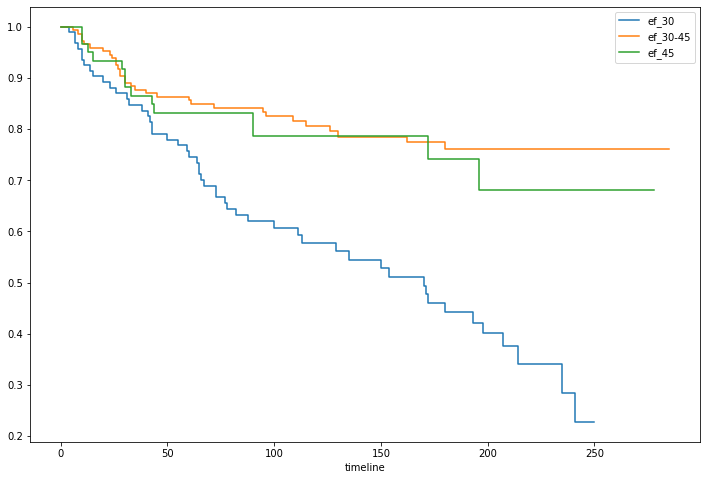

In [39]:
#KM curve based on EF
group1=data[data['ef_cat']== "ef_30"]
group2=data[data['ef_cat']== "ef_30_45"]
group3=data[data['ef_cat']== "ef_45"]
T=group1['time']
E=group1['DEATH_EVENT']
T1=group2['time']
E1=group2['DEATH_EVENT']
T2=group3['time']
E2=group3['DEATH_EVENT']
kmf = KaplanMeierFitter()

ax = plt.subplot(111)
ax = kmf.fit(T, E, label="ef_30").plot(ax=ax ,ci_show=False)
ax = kmf.fit(T1, E1, label="ef_30-45").plot(ax=ax,ci_show=False)
ax = kmf.fit(T2, E2, label="ef_45").plot(ax=ax,ci_show=False)

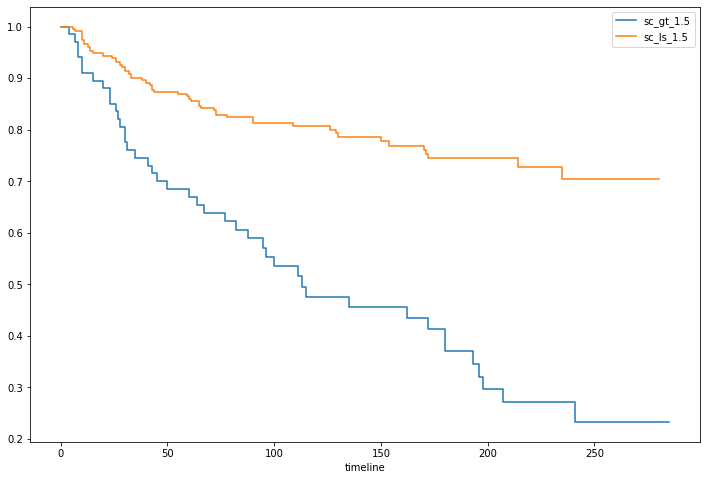

In [40]:
#KM curve based on serum_creatinine
group1=data[data['cret_level']=="sc_gt_1.5"]
group2=data[data['cret_level']== "sc_ls_1.5"]
T=group1['time']
E=group1['DEATH_EVENT']
T1=group2['time']
E1=group2['DEATH_EVENT']
kmf = KaplanMeierFitter()

ax = plt.subplot(111)
ax = kmf.fit(T, E, label="sc_gt_1.5").plot(ax=ax ,ci_show=False)
ax = kmf.fit(T1, E1, label="sc_ls_1.5").plot(ax=ax,ci_show=False)

In [43]:
#cox model
# Create Model
cph = CoxPHFitter()

# Fit the data to train the model
cph.fit(corr_dt, 'time', event_col='DEATH_EVENT')

# Have a look at the significance of the features
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -465.68
         time fit was run = 2020-08-28 20:33:12 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                        0.04       1.05       0.01             0.03             0.06                 1.03                 1.07
anemia                     0.51       1.67       0.22             0.07             0.95                 1.08                 2.58
creatinine_phosphokinase   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
diabetes                   0.20       1.23       0.23            -0.24             0.65                 0.79                 1.91
ejection_fraction         -0.04       0.96       0.03            -0.10             0.01                 0.91                 1.01
high_blood_pressure        0.51       1.66       0.22             0.08             0.93                 1.09                 2.54
platelets                  0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_creatinine           0.20       1.22       0.09             0.01             0.39                 1.01                 1.47
serum_sodium              -0.03       0.97       0.02            -0.08             0.01                 0.92                 1.01
sex                       -0.27       0.76       0.25            -0.77             0.22                 0.46                 1.25
smoking                    0.17       1.19       0.25            -0.32             0.67                 0.73                 1.95
ef_cat                     0.02       1.02       0.43            -0.83             0.87                 0.44                 2.38
QuantileRank_Platelets    -0.12       0.89       0.22            -0.55             0.32                 0.57                 1.38
cret_level                 0.64       1.90       0.29             0.07             1.21                 1.07                 3.37
                             z      p   -log2(p)
covariate                                       
age                       4.68 <0.005      18.41
anemia                    2.30   0.02       5.53
creatinine_phosphokinase  2.54   0.01       6.47
diabetes                  0.90   0.37       1.44
ejection_fraction        -1.65   0.10       3.33
high_blood_pressure       2.34   0.02       5.71
platelets                 0.05   0.96       0.06
serum_creatinine          2.11   0.03       4.86
serum_sodium             -1.44   0.15       2.73
sex                      -1.09   0.28       1.86
smoking                   0.70   0.49       1.04
ef_cat                    0.05   0.96       0.05
QuantileRank_Platelets   -0.51   0.61       0.72
cret_level                2.19   0.03       5.13
---
Concordance = 0.74
Partial AIC = 959.37
log-likelihood ratio test = 87.04 on 14 df
-log2(p) of ll-ratio test = 39.41

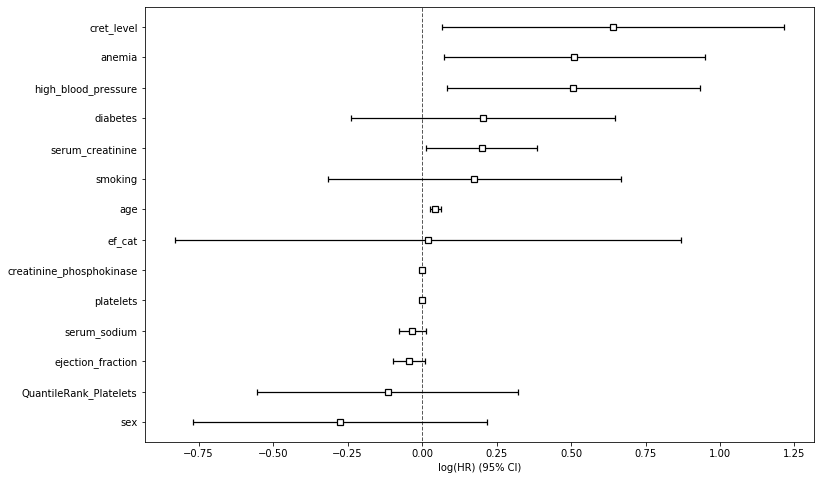

In [44]:
cph.plot()

In [45]:
## I want to see the Survival curve at the age level.
## Random patients
patients = [1,25,111]

rows_selected = corr_dt.iloc[patients, 0:16]
rows_selected

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,ef_cat,QuantileRank_Platelets,cret_level
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,1,1,0
25,80.0,0,148,1,38,0,149000.00,1.9,144,1,1,23,1,1,0,1
111,55.0,0,60,0,35,0,228000.00,1.2,135,1,1,90,0,1,1,0


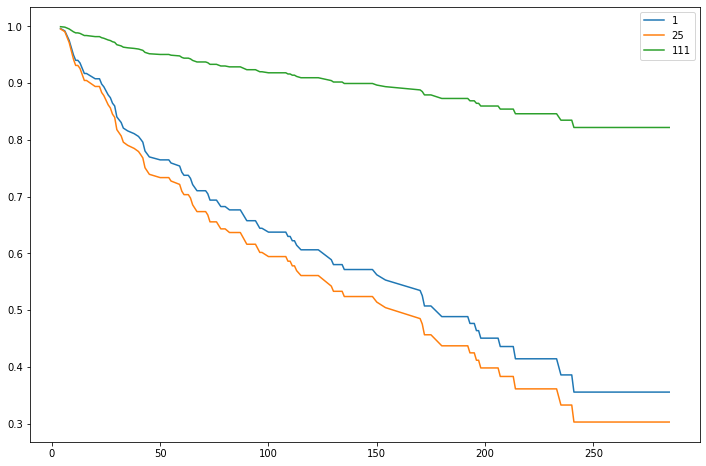

In [46]:
## Lets predict the survival curve for the selected patients. 
## Patients can be identified with the help of the number mentioned against each curve.
cph.predict_survival_function(rows_selected).plot()

